
# Q Learning with OpenAI Taxi-v3 🕹️🚕


In this Notebook, we'll implement an agent that plays OpenAI Taxi-v3.

The goal of this game is that our agent must pick up the passenger at one location and drop him off to the goal as fast as possible.

There are 4 locations (labeled by different letters) and your job is to pick up the passenger at one location and drop him off in another.

* You receive +20 points for a successful dropoff
* Lose 1 point for every timestep it takes.
* There is also a 10 point penalty for illegal pick-up and drop-off actions (if you don't drop the passenger in one of the 3 other locations)





## Step 0: Import libs


* Numpy for our Qtable
* OpenAI Gym for our Taxi Environment
* Random to generate random numbers


In [1]:
import numpy as np
import gym
import random

## Step 1: Initiate the environment
* Here we'll create the Taxi environment.
* OpenAI Gym is a library composed of many environments that we can use to train our agents.


In [2]:
env = gym.make("Taxi-v3")
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



## Step 2: Create a Q-table and init it with zeros


* Now, we'll create our Q-table, to know how much rows (states) and columns (actions) we need, we need to calculate the `action_size` and the `state_size`
* OpenAI Gym provides us a way to do that: `env.action_space.n` and `env.observation_space.n`


In [3]:


action_size = env.action_space.n
print("Action size ", action_size)

state_size = env.observation_space.n
print("State size ", state_size)

obs = env.reset()
print(env.action_space)

Action size  6
State size  500
Discrete(6)


In [4]:
qtable = np.zeros((state_size, action_size))
print(qtable)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


## Step 3: Create the hyperparameters

In [5]:
total_episodes = 50000        # Total episodes
total_test_episodes = 5     # Total test episodes
max_steps = 99                # Max steps per episode

learning_rate = 0.7           # Learning rate
gamma = 0.618                 # Discounting rate

# Exploration parameters
epsilon = 1.0                 # Exploration rate
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.01            # Minimum exploration probability 
decay_rate = 0.01             # Exponential decay rate for exploration prob

## Step 4: The Q learning algorithm

* Here we implement the Q-learning algorithm that will train the taxi

In [6]:
# 2 For life or until learning is stopped
for episode in range(total_episodes):
    # Reset the environment
    state = env.reset()
    step = 0
    done = False
    
    for step in range(max_steps):
        # 3. Choose an action a in the current world state (s)
        ## First we randomize a number
        exp_exp_tradeoff = random.uniform(0,1)
        
        ## If this number > greater than epsilon --> exploitation (taking the biggest Q value for this state)
        if exp_exp_tradeoff > epsilon:
            action = np.argmax(qtable[state,:])
        
        # Else doing a random choice --> exploration
        else:
            action = env.action_space.sample()
        
        # Take the action (a) and observe the outcome state(s') and reward (r)
        new_state, reward, done, info = env.step(action)

        # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
        qtable[state, action] = qtable[state, action] + learning_rate * (reward + gamma * 
                                    np.max(qtable[new_state, :]) - qtable[state, action])
                
        # Our new state is state
        state = new_state
        
        # If done : finish episode
        if done == True: 
            break
    
    # Reduce epsilon (because we need less and less exploration)
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)

## Step 5: Use our Q-table to define the Taxi driving policy

In [7]:
env.reset()
rewards = []

images = []
for episode in range(total_test_episodes):
    state = env.reset()
    ##img = env.render(mode="rgb_array")
    step = 0
    done = False
    total_rewards = 0
    # print("****************************************************")
    # print("EPISODE ", episode)

    for step in range(max_steps):
        ## Render images and save into an array
        #images.append(img)
        img = env.render()

        action = np.argmax(qtable[state,:])
        
        new_state, reward, done, info = env.step(action)
        
        total_rewards += reward
        
        if done:
            rewards.append(total_rewards)
            #print ("Score", total_rewards)
            break
        state = new_state
env.close()
#imageio.mimwrite('./taxi.gif',
#                [np.array(img) for i, img in enumerate(images) if i%2 == 0],
#                fps=29)
print ("Score over time: " +  str(sum(rewards)/total_test_episodes))

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : |_: |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : :_: |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : :_: : |
| | : | : |
|Y| : |B: |

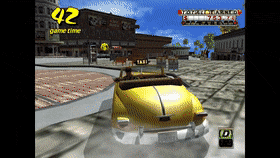

In [24]:
from IPython.display import Image
image = Image("/Users/jvang/Documents/Projects/Applied_AI_IT_Uni/day08/taxi.gif")
display(image)